#**IPL Analysis- by Yash Shinde**

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL has an exclusive window in ICC Future Tours Programme.

The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of the IPL in 2019 was ₹475 billion (US 6.7 billion dollars), according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion (US 160 million dollars) to the GDP of the Indian economy.

There have been twelve seasons of the IPL tournament. The current IPL title holders are the Mumbai Indians, who won the 2019 season. The venue for the 2020 season has been moved, due to the ongoing COVID-19 pandemic; games will now take place in the United Arab Emirates from 19 September through 10 November.
[To know more about IPL, click here](https://en.wikipedia.org/wiki/Indian_Premier_League)

![IPL](https://upload.wikimedia.org/wikipedia/en/thumb/8/84/Indian_Premier_League_Official_Logo.svg/375px-Indian_Premier_League_Official_Logo.svg.png)

In [49]:
project_name = "IPL Analysis"

In [50]:
!pip install jovian --upgrade -q

In [51]:
import jovian

In [52]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "uayashu145/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/uayashu145/ipl-analysis


'https://jovian.ml/uayashu145/ipl-analysis'

##**Loading Libraries and Datasets**
Let us begin our analysis by loading the Dataset & Python Modules/ Packages/ Libraries.
There are several options for getting the dataset into Jupyter:

* Download the CSV manually and upload it via Jupyter's GUI
* Use the urlretrieve function from the urllib.request to download CSV files from a raw URL directly
* Use a helper library e.g. opendatasets, which contains a collection of curated datasets and provides a function for directly download.

We'll use the ***Download the CSV manually and upload it via Jupyter's GUI*** method.

In [53]:
!pip install pandas
!pip install pandas matplotlib
!pip install seaborn
import numpy as np # numerical computing 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame
import matplotlib.pyplot as plt #visualization
%matplotlib inline
import seaborn as sns #modern visualization
from urllib.request import urlretrieve
urlretrieve('https://www.kaggle.com/nowke9/ipldata?select=matches.csv')


#plotting style settings
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.facecolor'] = '#00000000'


##**Reading input dataset**

In order to read the input data, let us first define the directory/path in which the input file is present.Since we have downloaded the CSV manually and uploaded it via Jupyter's GUI, we will read the input csv using **`pd.read_csv()`** function.

In [54]:
jovian.commit(outputs=['matches.csv'])
matches = pd.read_csv('matches.csv')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "uayashu145/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ml/uayashu145/ipl-analysis


##**Get basic information of Data**
Let us check the basic information of the dataset. The very basic information to know is the dimension of the dataset – rows and columns – that’s what we find out with the method ***`shape`***.

In [55]:
matches.shape

(756, 18)

Also, it’s important to know the different types of data/variables in the given dataset. This can be done by the method ***`info()`***.

In [56]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

Now, let's perform a simple summary statistics using the method **`describe()`**.

In [57]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,378.500000,2013.444444,0.025132,13.283069,3.350529
std,218.382692,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,756.000000,2019.000000,1.000000,146.000000,10.000000



And the final level of this basic information retrieval is to see a couple of actual rows of the input dataset using the method **`head()`**.

 Let's see each unique team

In [58]:
matches.team1.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

It can be seen that there is a redundancy here.Teams like ***`Rising Pune Supergiants`*** and ***`Rising Pune Supergiant`*** and ***`Delhi Daredevils`*** and ***`Delhi Capitals`*** points to same teams but yet two different entries are visible due to addition of 's'. So,let's correct the error.
There will be three columns where the fix will be required-

1. In team1 column
2. In team2 column
3. In winner column
4. In toss winner column

In [59]:
matches.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
matches.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
matches.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
matches.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)

In [60]:
matches.team1.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions'], dtype=object)

In [61]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,18-04-08,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,19-04-08,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,19-04-08,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,20-04-08,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,20-04-08,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


Finding the ***`Tied or No result`*** matches in the dataset

In [62]:
matches[matches.result != 'normal']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2009,Cape Town,23-04-09,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
130,131,2010,Chennai,21-03-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
241,242,2011,Delhi,21-05-11,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
328,329,2013,Hyderabad,07-04-13,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
341,342,2013,Bangalore,16-04-13,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
416,417,2014,Abu Dhabi,29-04-14,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
476,477,2015,Ahmedabad,21-04-15,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
486,487,2015,Bangalore,29-04-15,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
511,512,2015,Bangalore,17-05-15,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
610,611,2017,Rajkot,29-04-17,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN


In [63]:
import jovian

In [64]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "uayashu145/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/uayashu145/ipl-analysis


'https://jovian.ml/uayashu145/ipl-analysis'

#**Exploratory Analysis and Visualization**



Now let's start to analyze & study the given dataset and findout various results and usefull information.

##**How many matches we’ve got in the dataset?**
As we’ve seen above, ***`id`*** is a variable that counts each observation in the data while each observation is a match. So to get the number of matches in our dataset is as same as to get the number of rows in the dataset or maximum value of the variable ***`id`***.

In [65]:
max_matches = matches['id'].max()
print('Total no. of matches played- ', max_matches)

Total no. of matches played-  756


##**The Number of matches played in each season?**
We can get the number of counts/matches played in each season using ***`value_counts()`***.

In [66]:
matches['season'].value_counts()


2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

It's is seen that the ***`IPL 2013`*** season had the most no of matches since most no of teams had participated in that season.  

##**Tied matches or matches with no result**

In [67]:
matches[matches.result != 'normal']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2009,Cape Town,23-04-09,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
130,131,2010,Chennai,21-03-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
241,242,2011,Delhi,21-05-11,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
328,329,2013,Hyderabad,07-04-13,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
341,342,2013,Bangalore,16-04-13,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
416,417,2014,Abu Dhabi,29-04-14,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
476,477,2015,Ahmedabad,21-04-15,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
486,487,2015,Bangalore,29-04-15,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
511,512,2015,Bangalore,17-05-15,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
610,611,2017,Rajkot,29-04-17,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN


 There were ***`13 matches`*** with the result as ***`a tie(9) or no result(4)`***.

##**The Number of matches played in each venue?**
We can find number of matches played in each venue by again using ***`value_counts()`***.

In [68]:
matches['venue'].value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

***`Eden Gardens `*** has hosted the most no of matches i.e ***`77`*** followed by ***`Wankhede Stadium & M Chinnaswamy Stadium (73).`***

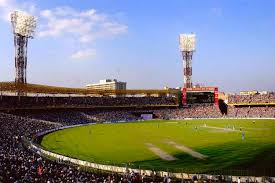

In [69]:
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

***`Mumbai Indians`*** has won most no of matches- **`109`**

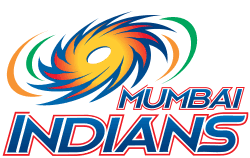

##**Which Team had won by maximum runs?**

To answer this question, we can divide the question logically – first we need to find maximum runs, then we can find the row (winning team) with this maximum runs – which would indeed be the team won by maximum runs. I’d like to emphasis here that it’s always important to divide your problem into logical sub-problems or modules and then build Python expressions/codes for those sub-modules finally adding them up to required code that will result in the solution.

***`idxmax()`*** will return the id of the maximumth value which in turn is fed into ***`iloc[]`*** that takes an index value and returns the row.


In [70]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                              621
season                         2017
city                          Delhi
date                       06-05-17
team1                Mumbai Indians
team2                Delhi Capitals
toss_winner          Delhi Capitals
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 620, dtype: object

If we’re interested only in the winning team in that row, then that could be retrieved as below.

In [71]:
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

***`Mumbai Indians`*** has the record of winning by maximum runs-**`146`**

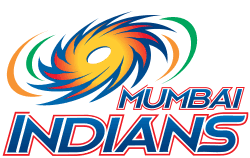

##**Which Team had won by (closest margin) minimum runs?**

To know the team that was won by the closest margin, we have to do the opposite of what we’ve done in the above steps. But there’s a caveat in that. In Cricket, if the team that’s batting second wins the match (by chasing), it’ll be said “Team second won by x number of wickets” and if the team that’s bowling second (batted first) wins the match (by defending their score), it’ll be said “Team first won by x number of runs”. Hence, the minimum win by runs will always be 0 and the minimum win by wickets will also always be 0 in a tournament since sometimes chasing team or sometimes the team that batted first could win. To overcome this caveat, we just have to apply a simple workaround as you can see below.

Instead of just getting the minimum score (which always would be 0), we have subsetted the data that has win_by_runs greater than or equal to 1 (there by eliminating the zero-issue).

In [72]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Kings XI Punjab'

Even though other teams have won by `1 run` margin, but ***`Kings XI Punjab`*** had done this for the first time. So, we get the result as ***`Kings XI Punjab`***.

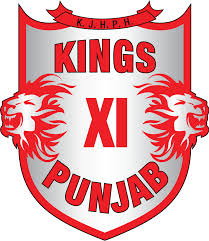

In [73]:
import jovian

In [74]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "uayashu145/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/uayashu145/ipl-analysis


'https://jovian.ml/uayashu145/ipl-analysis'

##**Which is the most successful IPL Team?**

The most successful IPL team is the team that has won most number of times which also means, answer it to this is to count the number of instances in each winning team.

Text(0, 0.5, 'Teams')

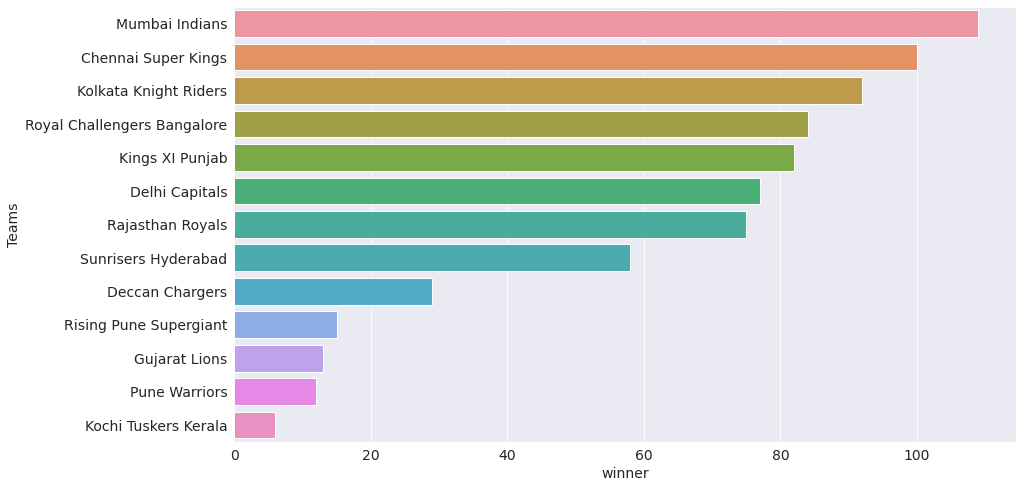

In [75]:

data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');
plt.ylabel('Teams')

***`Mumbai Indians`*** is the most successful team in the IPL.

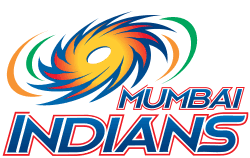

## **Who is the  winner of most Man of the Match award amongst all the seasons?**

In [76]:
matches['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
Kuldeep Yadav      1
SA Asnodkar        1
A Singh            1
TM Dilshan         1
YS Chahal          1
Name: player_of_match, Length: 226, dtype: int64

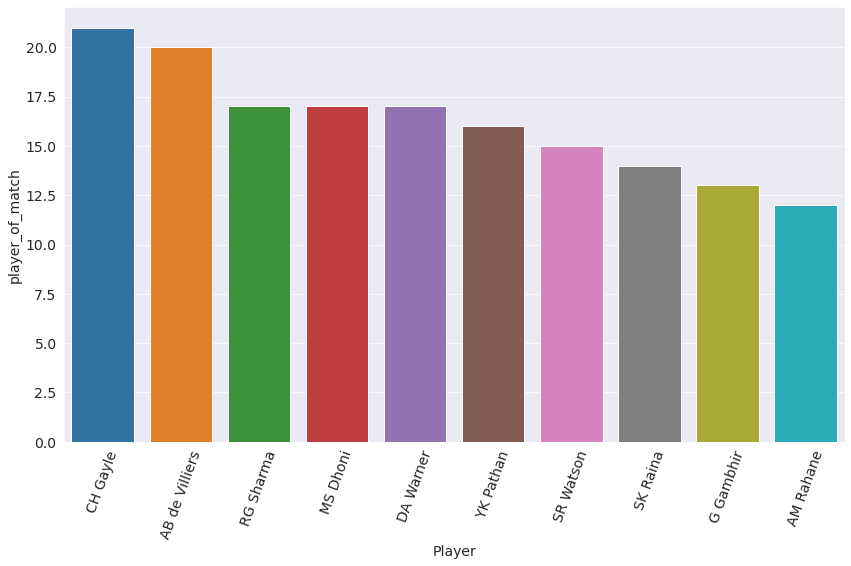

In [77]:
mom=matches['player_of_match'].value_counts().head(10)
sns.barplot(y = mom, x = mom.index, orient='v');
plt.xticks(rotation=70);
plt.xlabel('Player');

***`Chris Gayle`*** Tops the List with ***`21 MOMs`*** amongst all the players from the above data.

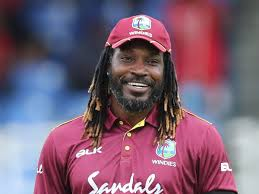

##**Most Toss wins**
Let's see which team has won most no of tosses.

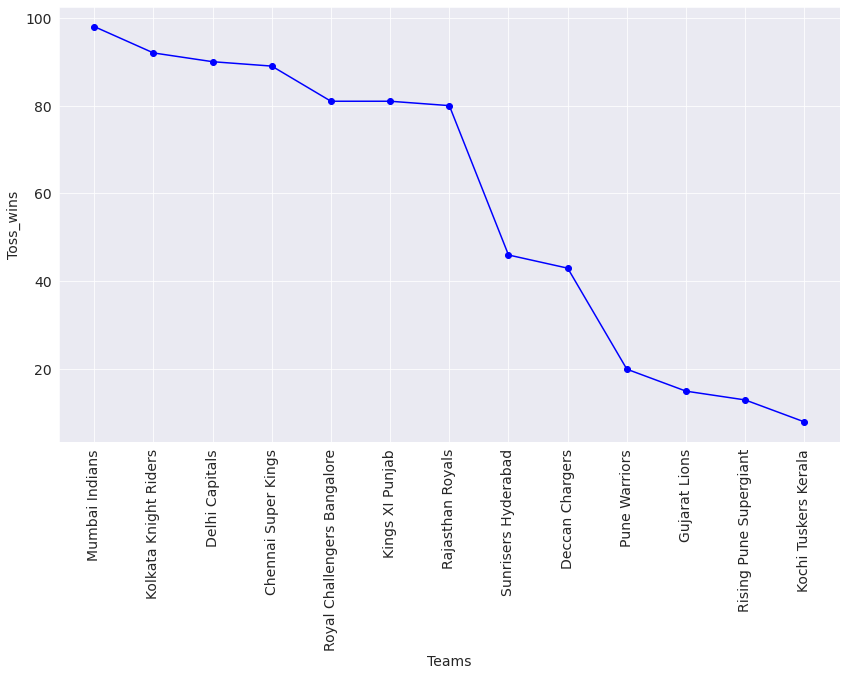

In [78]:
#tm=matches[matches.toss_winner==matches.winner]
t=matches['toss_winner'].value_counts()
plt.plot(t,"bo-")
plt.xlabel('Teams')
plt.ylabel('Toss_wins')
plt.xticks(rotation=90);

Here, too ***`Mumbai Indians`*** stands above all.

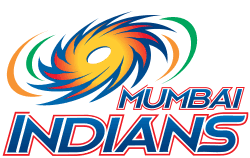

## **Toss win - Match win?**
Let's see the impact of winning toss on the match result

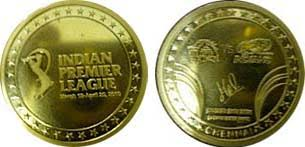

In [79]:
toss_winner = matches[matches['toss_winner']==matches['winner']]
toss_winner

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2008,Chandigarh,19-04-08,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
8,9,2008,Hyderabad,24-04-08,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
10,11,2008,Bangalore,26-04-08,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,SR Watson,M Chinnaswamy Stadium,MR Benson,IL Howell,NaN
12,13,2008,Mumbai,27-04-08,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
14,15,2008,Bangalore,28-04-08,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,751,2019,Mohali,05-05-19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,752,2019,Mumbai,05-05-19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
753,754,2019,Visakhapatnam,08-05-19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,755,2019,Visakhapatnam,10-05-19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [80]:
print('There are {} matches in IPL played till now where toss winner is the winner of the match.'.format(toss_winner.id.count()))

There are 393 matches in IPL played till now where toss winner is the winner of the match.


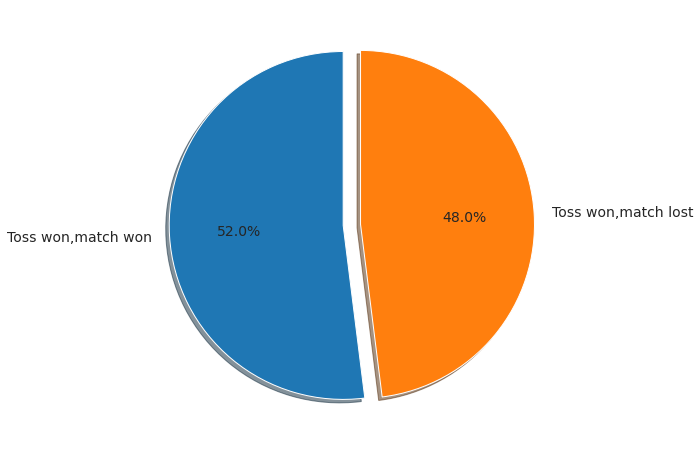

In [81]:
fig1,ax1 = plt.subplots()
labels = ['Toss won,match won','Toss won,match lost']
sizes=[toss_winner.id.count(),(max_matches-toss_winner.id.count())]
explode = (0.1, 0) 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

It can be seen that impact of winning the toss has an almost ***`Equal amount`*** of impact on the result of match.
So, it can be said that winning toss doesn't necessarily creates an impact on the result of match. 

# **The MI VS CSK Battle!!!**
Let's now see the stats related to MI vs CSK 

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRA9ywYq1afSZ9yV5rE0tRLZcHra9mT4JfkTQ&usqp=CAU)

In [82]:
mi_csk=matches[((matches.team1 =="Mumbai Indians") & (matches.team2 =="Chennai Super Kings")) | 
               ((matches.team2 =="Mumbai Indians") & (matches.team1 =="Chennai Super Kings"))]
mi_csk

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
7,8,2008,Chennai,23-04-08,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
36,37,2008,Mumbai,14-05-08,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
58,59,2009,Cape Town,18-04-09,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
102,103,2009,Port Elizabeth,16-05-09,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
134,135,2010,Mumbai,25-03-10,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN
151,152,2010,Chennai,06-04-10,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper,NaN
174,175,2010,Mumbai,25-04-10,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
197,198,2011,Mumbai,22-04-11,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,8,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba,NaN
248,249,2012,Chennai,04-04-12,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
295,296,2012,Mumbai,06-05-12,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,2,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani,NaN


In [83]:
print('The no of matches played between MI and CSK is {}-the most between any teams'.format(mi_csk.id.count()))

The no of matches played between MI and CSK is 28-the most between any teams


## **Let's see which team has the dominance in MI vs CSK rivalry.**


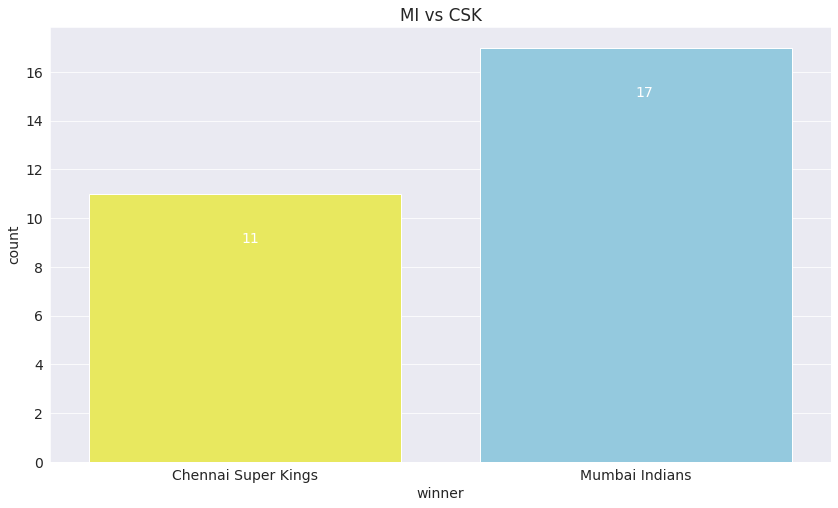

In [84]:
plt.title('MI vs CSK')
sns.countplot(x=mi_csk['winner'],palette=['#FFFF48','#87ceeb'])
plt.text(-0.009,9,s=mi_csk['winner'].value_counts()['Chennai Super Kings'], color='white')
plt.text(1,15,s=mi_csk['winner'].value_counts()['Mumbai Indians'], color='white');

***`Mumbai Indians`*** leads the rivalry with ***`6`*** extra wins as compared to ***`CSK`***

## **Let's find the statistics related to IPL Finals**

Find the final winner of IPL for each season. For this let's create a new dataframe for finals.

In [85]:
final_match = matches.groupby('season').tail(1).sort_values('season').reset_index()
final_match

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,57,58,2008,Mumbai,01-06-08,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
1,114,115,2009,Johannesburg,24-05-09,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
2,174,175,2010,Mumbai,25-04-10,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
3,247,248,2011,Chennai,28-05-11,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
4,321,322,2012,Chennai,27-05-12,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN
5,397,398,2013,Kolkata,26-05-13,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN
6,457,458,2014,Bangalore,01-06-14,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
7,516,517,2015,Kolkata,24-05-15,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN
8,576,577,2016,Bangalore,29-05-16,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
9,635,636,2017,Hyderabad,21-05-17,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN


#**IPL Final match appearences**

Now let's find out how many times each team have appeared into finals

In [86]:
final_match_team = pd.concat([final_match['team1'],final_match['team2']])
final_match_team_d=dict(final_match_team.value_counts())
final_match_team_d

{'Chennai Super Kings': 8,
 'Mumbai Indians': 5,
 'Royal Challengers Bangalore': 3,
 'Kolkata Knight Riders': 2,
 'Sunrisers Hyderabad': 2,
 'Rajasthan Royals': 1,
 'Deccan Chargers': 1,
 'Rising Pune Supergiant': 1,
 'Kings XI Punjab': 1}

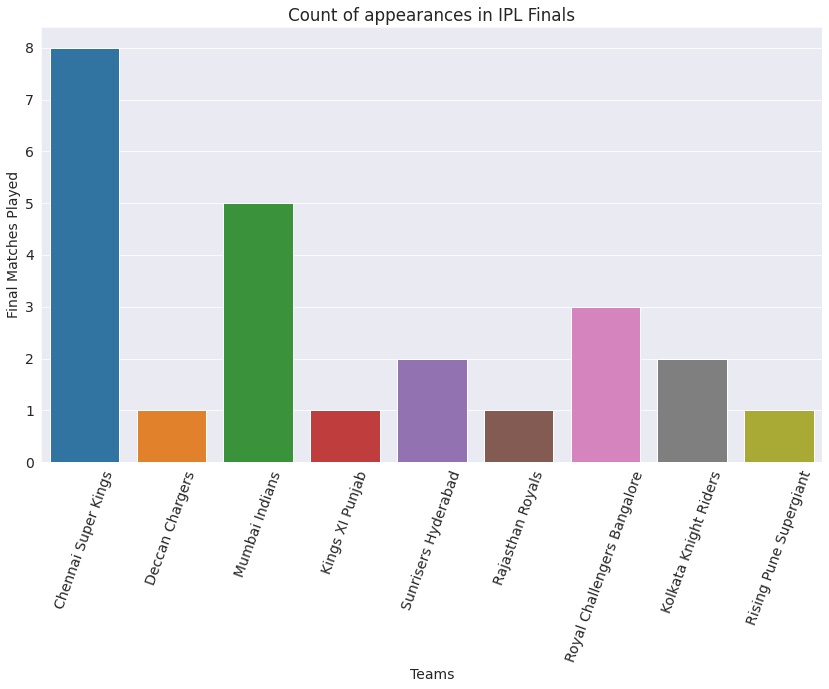

In [87]:
plt.title('Count of appearances in IPL Finals')
plt.xlabel('Teams')
sns.countplot(x=final_match_team)
plt.ylabel('Final Matches Played')
plt.xticks(rotation=70);

In [88]:
final_winner=final_match['winner'].value_counts()
final_winner_d=dict(final_winner)

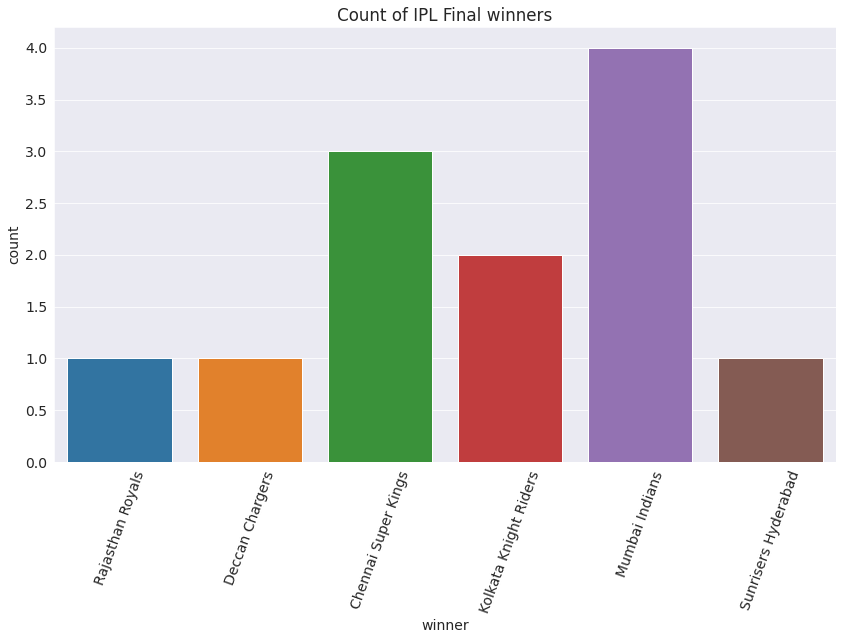

In [89]:
sns.countplot(x=final_match['winner'])
plt.xticks(rotation=70);
plt.title("Count of IPL Final winners");

In [90]:
not_final_winners=[]
for i in final_match_team:
    if i in final_winner:
         continue
    else:
        not_final_winners= not_final_winners+[i]     
not_final_winners

['Kings XI Punjab',
 'Royal Challengers Bangalore',
 'Royal Challengers Bangalore',
 'Royal Challengers Bangalore',
 'Rising Pune Supergiant']

In [91]:
import jovian

In [92]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "uayashu145/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/uayashu145/ipl-analysis


'https://jovian.ml/uayashu145/ipl-analysis'

## **Inferences and Conclusion**



## ***The following are the inferences and conclusions after performing data analysis on the dataset `'matches.csv'`*** 

---


1. So, we have ***`6`*** unique teams that have won the IPL Final.
   ***`Mumbai Indians`*** have won most ***`(4)`*** IPL titles followed   by ***`Chennai Super Kings (3)`***. Thus, it is obvious that these 2 teams are the most successful teams in the IPL history. 

2. ***`Royal Challengers Bangalore`*** have appeared for ***`3 times`*** in IPL Finals but still is without any title wins. Followed to ***`Royal Challengers Bangalore`*** ***`Rising Pune Supergiant`*** , ***`Kings XI Punjab`*** have appeared *`1 time each`* without title wins. 

3. ***`Chennai Super Kings`*** have appeared for ***`(8) times`*** in IPL Finals -the most by any team in IPL. At second place, it's ***`Mumbai Indians`*** with ***`(5) times`***.

4. Even though ***`Mumbai Indians`*** have greater number of wins but winning percentage of ***`Chennai Super Kings`*** is higher than ***`Mumbai Indians`***. But it may also be noted that when comparing the head to head matches between ***`Mumbai Indians and Chennai Super Kings, Mumbai Indians`*** have won most matches.

5. ***` Kolkata (Eden Gardens)`*** has hosted most number of matches in the IPL.

6. ***`Chris Gayle`*** has received highest number of Man of the Match Awards.

7. There were ***`13 matches`*** with the result as a t***`ie(9) or no result(4)`***.

8. It can be seen that impact of winning the toss has an ***`almost Equal amount of impact`*** on the result of match. So, it can be said that winning toss doesn't necessarily creates an impact on the result of match.

9. The teams in ***`2011,2012 and 2013 are greater`*** than other seasons due to which matches played in those seasons are greater.

10. The mean value of ***`win_by_runs and	win_by_wickets is 13.283069	and 3.350529 respectively. `***

In [93]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## **References and Future Work**



##**Future Work**
The dataset for IPL(2008-2019) consisted two .csv files i.e ***`matches.csv and deliveries.csv`***. Here ***`matches.csv`*** is considered in this project for the analysis. For performing more data analysis related to ***`scores, runs by individuals, wickets etc`*** can be retrieved from ***`deliveries.csv`***. Moreover ***`matches.csv and deliveries.csv`*** can be merged together with respect to their ***`match id`*** and interesting data can be explored from the merged data.

##**References**
*  ZerotoPandas Tutorial by JovianML- https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas
*  Indian Premier League 2008-2019 dataset-  https://www.kaggle.com/nowke9/ipldata
*   Markdown Syntax- https://learnxinyminutes.com/docs/markdown/
*  For errors and bugs correction- https://stackoverflow.com/ 


# **Thank You!!!**

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)